In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Stress-Lysis.csv?raw=True')

In [72]:
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [73]:
data.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [74]:
X = data.drop('Stress Level',axis=1)
Y = data['Stress Level']

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

<Axes: xlabel='Stress Level', ylabel='count'>

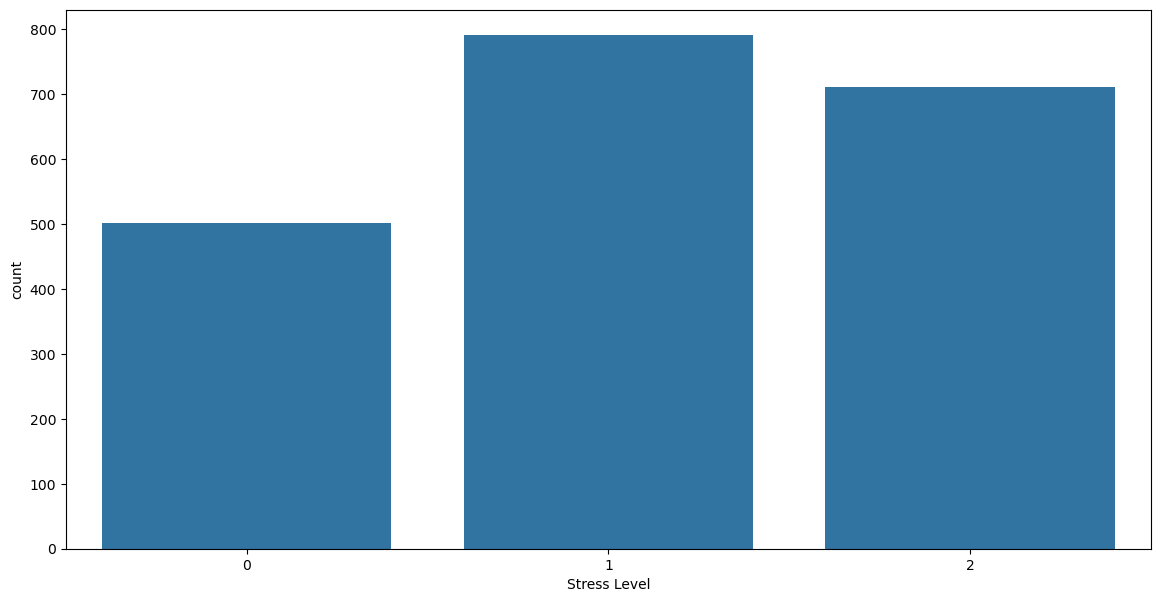

In [77]:
plt.figure(figsize=(14,7))
sns.countplot(data=data,x='Stress Level')

In [76]:
import tensorflow as tf 

In [92]:
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Input(shape=(3,)))

# hidden layer
model.add(tf.keras.layers.Dense(units=45,activation='relu'))
# model.add(tf.keras.layers.Dense(units=60,activation='relu'))
model.add(tf.keras.layers.Dense(units=45,activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [93]:
# Compiling our model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Fitting
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

In [95]:
model_history = model.history.history

In [96]:
model_history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

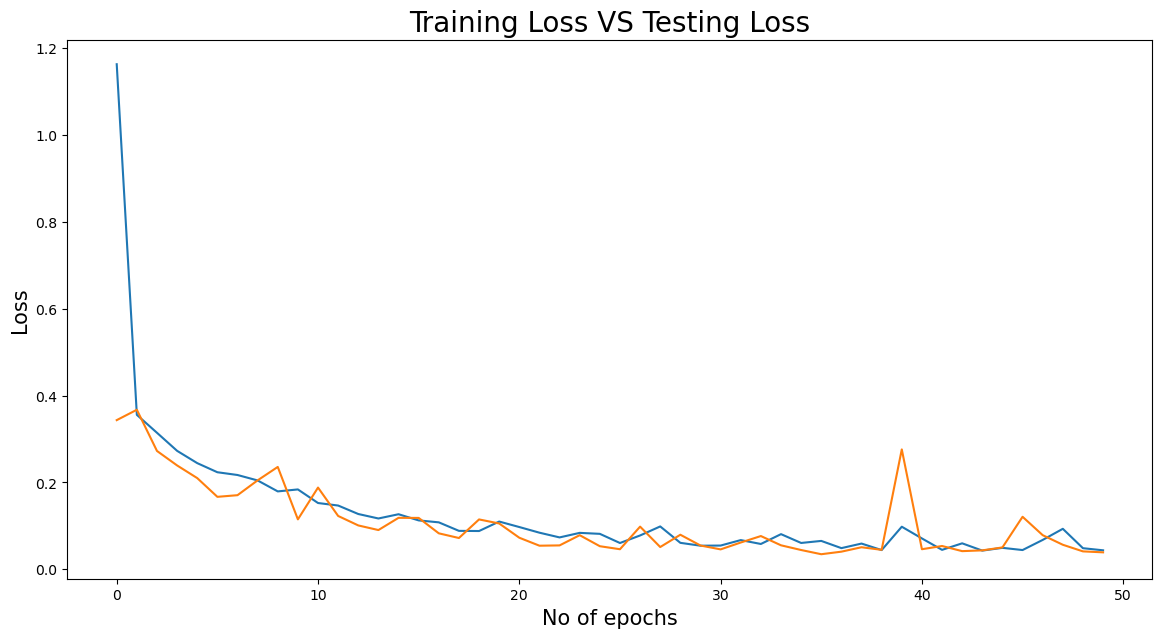

In [97]:
plt.figure(figsize=(14,7))
plt.plot(range(50),model_history['loss'])
plt.plot(range(50),model_history['val_loss'])
plt.title('Training Loss VS Testing Loss',size=20)
plt.xlabel('No of epochs',size=15)
plt.ylabel('Loss',size=15)
plt.show()

In [98]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [103]:
true_result = 0
false_result = 0
for i in range(len(predictions)):
    predict_value = predictions[i].argmax()
    actual_value = Y_test.iloc[i]
    if predict_value==actual_value:
        true_result += 1
    else:
        false_result += 1

In [104]:
print('True Result : ',true_result)
print('False Result : ',false_result)

True Result :  395
False Result :  6


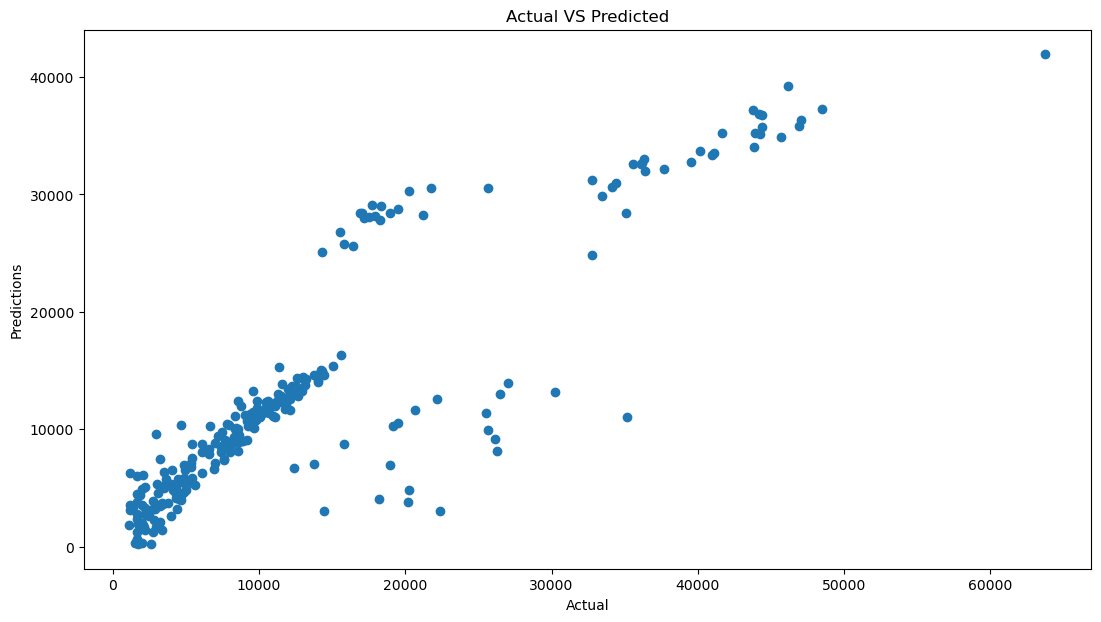

In [69]:
plt.figure(figsize=(13,7))
plt.scatter(Y_test,predictions)
plt.title('Actual VS Predicted')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()